# Problem Analysis Workshop 3

## Team Memebers ###

Eris Leksi - 9067882

Kapil Bhardwaj - 9064347 

Fasalu Rahman Kottaparambu - 8991782

Hello!

In this Problem Analysis Workshop we are going to focus on the term project now. After discussing it wth the team members, we chose our topic to be : "$TRUMP - sentiment analysis" . What we are going to do now is simple. We are going to take the dataset from an online API called AlphaVantage and we are going to show some EDA about the dataset. After that the next step consists of cleaning the data, and applying the requirements asked on problem analysis Workshop 3 rubric. 

LET"S START!

## Field of inquiry: 

Cryptocurrency Market Analysis


## Prompt to Gen AI:

"What are the consequences of using poorly defined research questions when analyzing and clustering cryptocurrency time-series data?"

## Short essay of conclusions:

When you don’t have a clear research question in cryptocurrency analysis, it’s easy to end up with vague goals and unreliable results. If you aren’t specific, clustering models can group data in ways that don’t actually match how the market behaves. This can lead to bad trading decisions, wasted time and resources, and less confidence in the analysis overall. Having a focused question—like figuring out when $TRUMP prices become more volatile—helps you use models effectively. Clear goals make sure your insights are useful, accurate, and relevant to real trading situations.

## 0. Importing the necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import requests
import io

## 1. Loading the dataset from the API

In [47]:
API_KEY = 'IC5Z69JRSVKWG8LG'
symbol = 'TRUMP'
symbol_link = 'LINK'
market = 'USD'

url = (
    f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY'
    f'&symbol={symbol}&market={market}&apikey={API_KEY}&datatype=csv'
)

url_link = (
    f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY'
    f'&symbol={symbol_link}&market={market}&apikey={API_KEY}&datatype=csv'
)

response = requests.get(url)
response_link = requests.get(url_link)

data = pd.read_csv(io.StringIO(response.text))
data_link = pd.read_csv(io.StringIO(response_link.text))

print("Data loaded successfully.")
data.head()
data_link.head()

Data loaded successfully.


,timestamp,open,high,low,close,volume
0,2025-07-03,13.560,13.615,13.514,13.538,32825.30
1,2025-07-02,12.900,13.856,12.734,13.560,1463473.34
2,2025-07-01,13.377,13.438,12.792,12.899,761410.43
3,2025-06-30,13.711,13.779,13.133,13.377,1203326.84
4,2025-06-29,13.401,13.875,13.249,13.710,881911.68


## 2. Displaying some EDA about the datasets

2.1. $TRUMP

In [48]:
print(data.info())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.describe())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.isnull().sum())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  164 non-null    object 
 1   open       164 non-null    float64
 2   high       164 non-null    float64
 3   low        164 non-null    float64
 4   close      164 non-null    float64
 5   volume     164 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.8+ KB
None
-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------
             open        high         low       close        volume
count  164.000000  164.000000  164.000000  164.000000  1.640000e+02
mean    13.435732   14.182256   12.554512   13.247561  2.151043e+06
std      6.003713    6.605942    5.129315    5.646367  1.841861e+06
min      7.570000    7.870000    7.150000    7.560000  6.852430e+04
25% 

2.2. CHAINLINK

In [49]:
print(data_link.info())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data_link.describe())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data_link.isnull().sum())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data_link.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  350 non-null    object 
 1   open       350 non-null    float64
 2   high       350 non-null    float64
 3   low        350 non-null    float64
 4   close      350 non-null    float64
 5   volume     350 non-null    float64
dtypes: float64(5), object(1)
memory usage: 16.5+ KB
None
-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------
             open        high         low       close        volume
count  350.000000  350.000000  350.000000  350.000000  3.500000e+02
mean    15.377957   15.998854   14.741257   15.376523  2.096576e+06
std      4.609055    4.950289    4.291094    4.608831  1.554415e+06
min      9.492000   10.157000    8.082000    9.489000  3.282530e+04
25%

### 2.1. Time series plot

2.1.1. $TRUMP

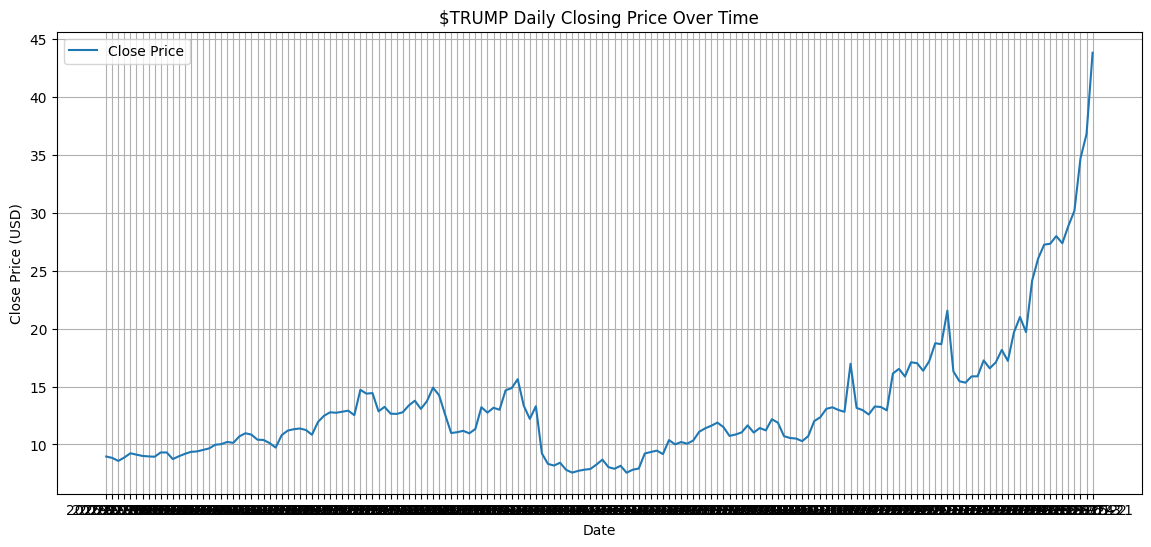

In [50]:
plt.figure(figsize=(14,6))
plt.plot(data['timestamp'], data['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('$TRUMP Daily Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

This chart visualizes the daily closing price trend over time, highlighting periods of volatility and stability.

2.1.2. CHAINLINK

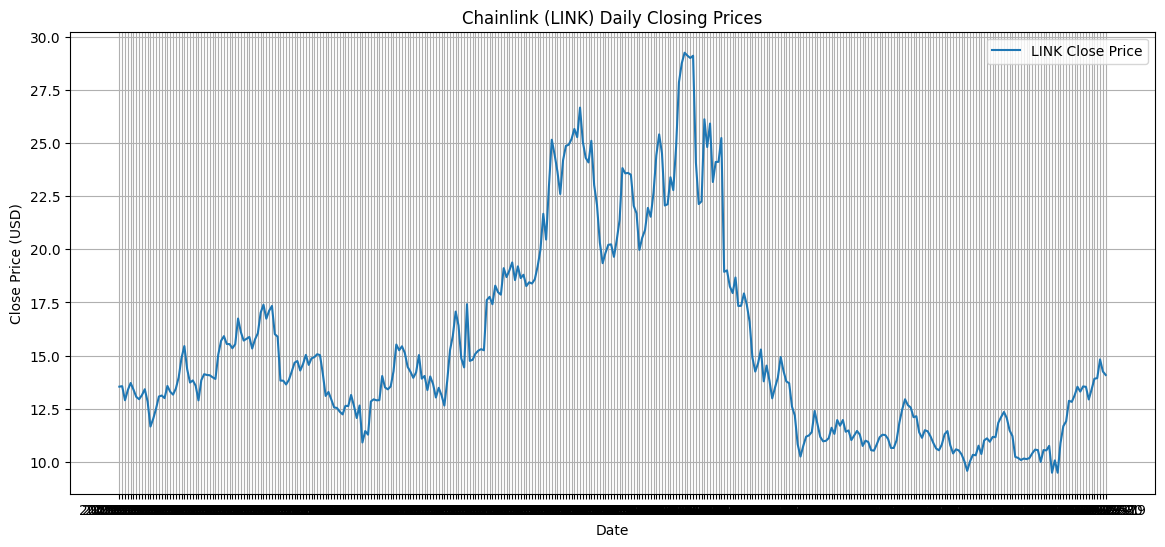

In [51]:
plt.figure(figsize=(14,6))
plt.plot(data_link['timestamp'], data_link['close'], label='LINK Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Chainlink (LINK) Daily Closing Prices')
plt.legend()
plt.grid(True)
plt.show()

### 2.2. Daily return calculation and histogram

2.2.1. $TRUMP

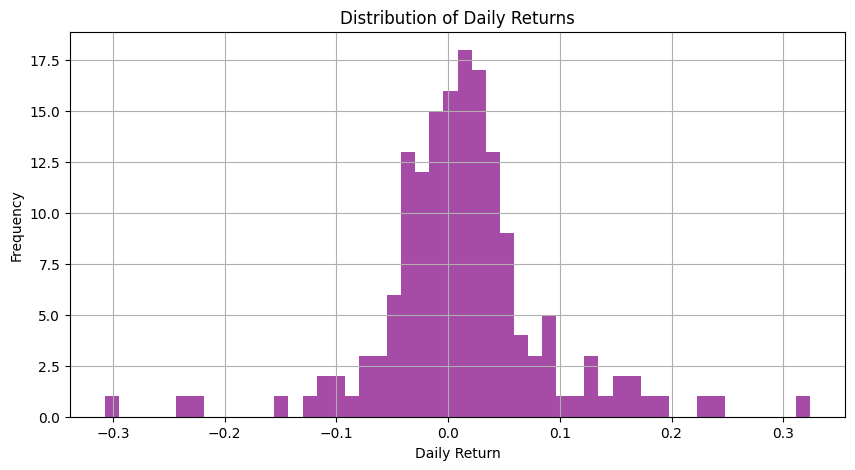

In [34]:
data['daily_return'] = data['close'].pct_change()

plt.figure(figsize=(10,5))
plt.hist(data['daily_return'].dropna(), bins=50, color='purple', alpha=0.7)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.grid(True)
plt.show()

The histogram shows the distribution of daily returns, illustrating how often small vs. large changes occur.

2.2.2. CHAINLINK

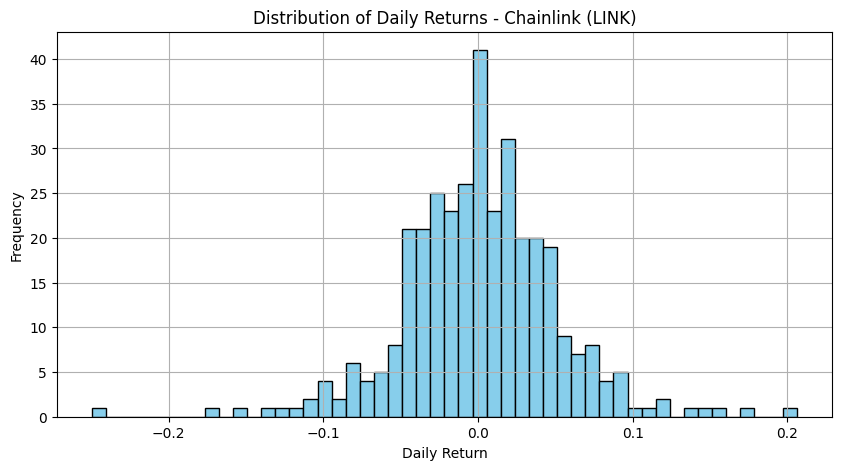

In [52]:
data_link['daily_return'] = data_link['close'].pct_change()

plt.figure(figsize=(10,5))
plt.hist(data_link['daily_return'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns - Chainlink (LINK)')
plt.grid(True)
plt.show()

### 2.3. Correlation Heatmap

2.3.1. $TRUMP

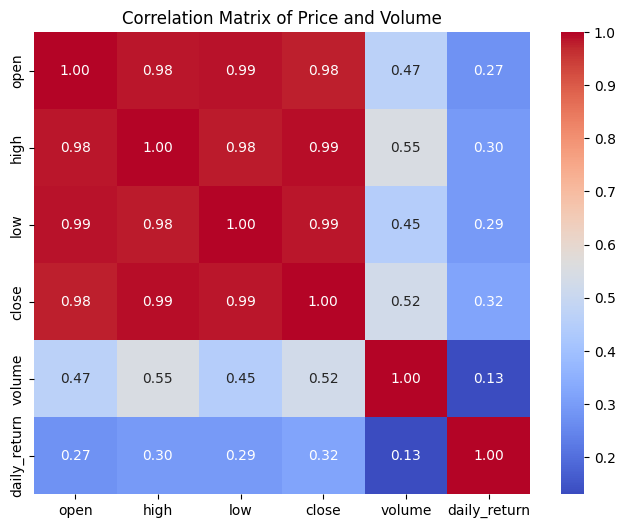

In [35]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_return']
corr = data[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Price and Volume')
plt.show()

The correlation matrix shows strong positive relationships between price features (open, high, low, close), as expected.

2.3.2. CHAINLINK

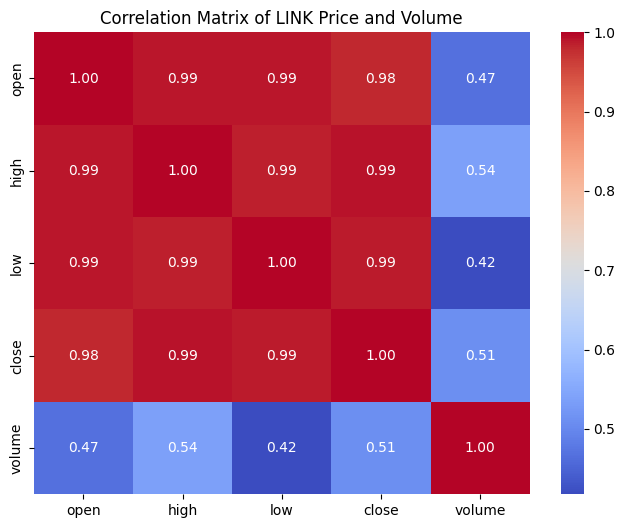

In [56]:
numeric_cols_link = [
    'open',
    'high',
    'low',
    'close',
    'volume'
]

corr_link = data_link[numeric_cols_link].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_link, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of LINK Price and Volume')
plt.show()

### 2.4. Boxplot for spotting the outleirs

2.4.1. $TRUMP

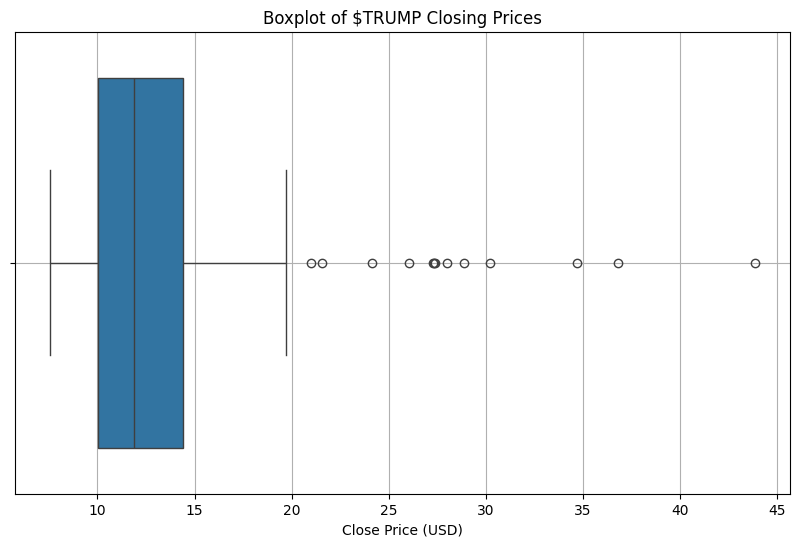

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['close'])
plt.title('Boxplot of $TRUMP Closing Prices')
plt.xlabel('Close Price (USD)')
plt.grid(True)
plt.show()

The boxplot helps detect price outliers and the overall spread of closing prices.

2.4.2. CHAINLINK

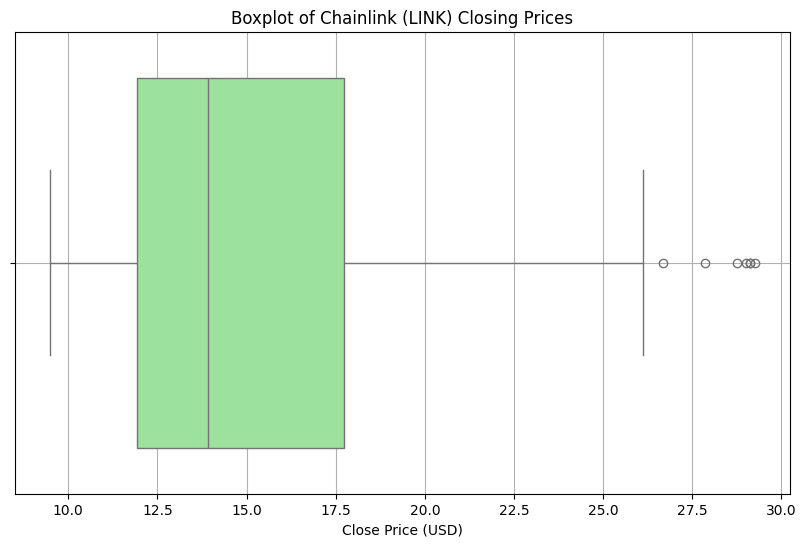

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_link['close'], color='lightgreen')
plt.title('Boxplot of Chainlink (LINK) Closing Prices')
plt.xlabel('Close Price (USD)')
plt.grid(True)
plt.show()

### 2.5. Moving average for smoothing (Timestamp = 7 days)

2.5.1. $TRUMP

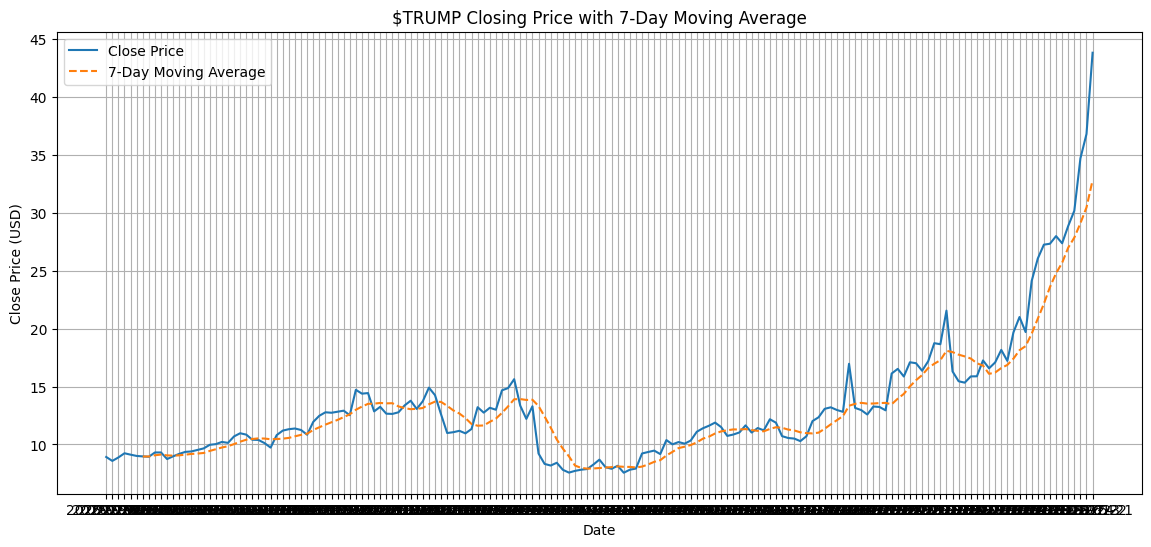

In [37]:
data['MA_7'] = data['close'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(data['timestamp'], data['close'], label='Close Price')
plt.plot(data['timestamp'], data['MA_7'], label='7-Day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('$TRUMP Closing Price with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

The 7-day moving average smooths out short-term fluctuations to better reveal price trends.

2.5.2. CHAINLINK

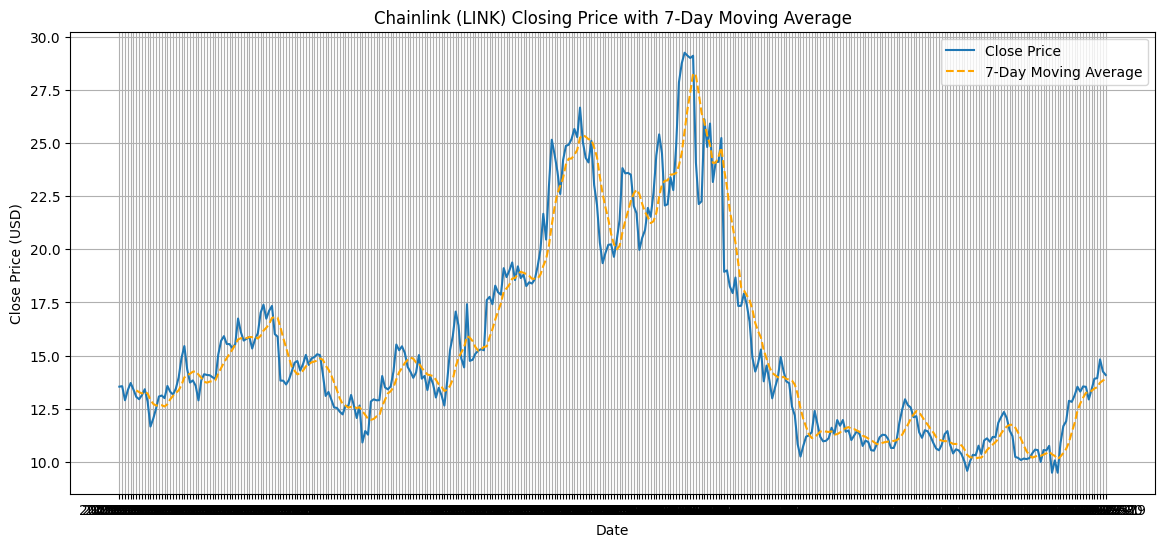

In [57]:
data_link['MA_7'] = data_link['close'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(data_link['timestamp'], data_link['close'], label='Close Price')
plt.plot(data_link['timestamp'], data_link['MA_7'], label='7-Day Moving Average', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Chainlink (LINK) Closing Price with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

## Merging the datasets

We do already know that they have the same feeatures and what we are going to do now is merging them.

In [59]:
trump_selected = data[['timestamp', 'open', 'high', 'low', 'close', 'volume']].copy()
trump_selected['coin_type'] = 'TRUMP'

link_selected = data_link[['timestamp', 'open', 'high', 'low', 'close', 'volume']].copy()
link_selected['coin_type'] = 'LINK'

In [60]:
merged_data = pd.concat([trump_selected, link_selected], ignore_index=True)

print("Data merged successfully.")
print(merged_data.head())

Data merged successfully.
    timestamp  open  high   low  close      volume coin_type
0  2025-07-03  8.84  9.06  8.81   8.96  156709.580     TRUMP
1  2025-07-02  8.58  8.98  8.50   8.84  874174.233     TRUMP
2  2025-07-01  8.89  9.02  8.52   8.58  479102.984     TRUMP
3  2025-06-30  9.25  9.25  8.82   8.88  382764.699     TRUMP
4  2025-06-29  9.13  9.30  8.99   9.24  194836.727     TRUMP


## 3. Data Cleaning and Preparation

In [64]:
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

merged_data.sort_values(['coin_type', 'timestamp'], inplace=True)
merged_data.reset_index(drop=True, inplace=True)

print("Data is ready for clustering.")

Data is ready for clustering.


Steps we took to clean the data:

- Parse dates

- Sort chronologically

- Scale prices

## Markdown cell for explaining the clustering applicability

Clustering helps identify hidden patterns and structural similarities in $TRUMP price movements over time. By grouping together time periods with comparable price dynamics, we can better understand different volatility regimes, detect emerging market trends, and uncover potential anomalies. Applying K-Means clustering allows us to segment the scaled closing prices into distinct clusters that represent varying market behaviors and investor sentiment. These insights can inform prediction models, guide trading decisions, and support risk management strategies by highlighting when the market transitions between phases.


## 4. Applying the K-Means Clustering

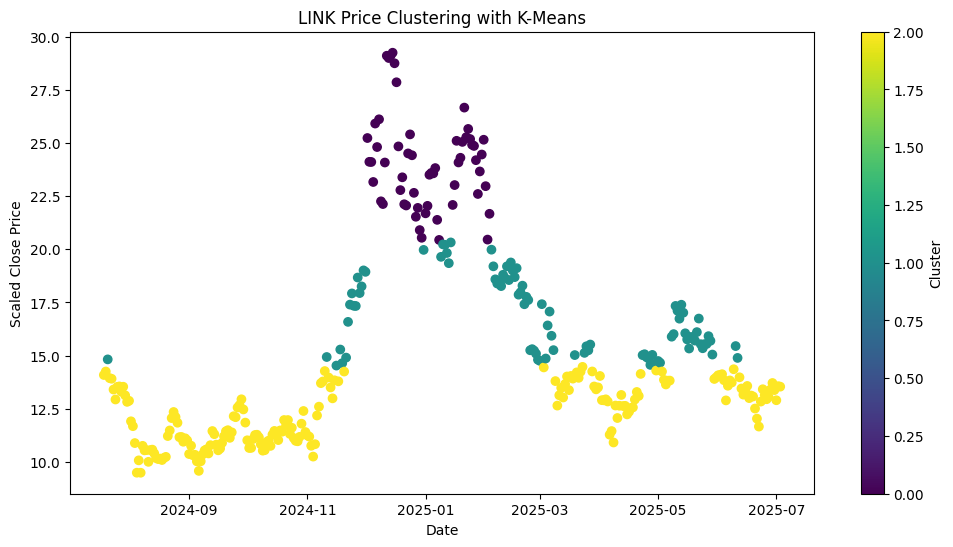

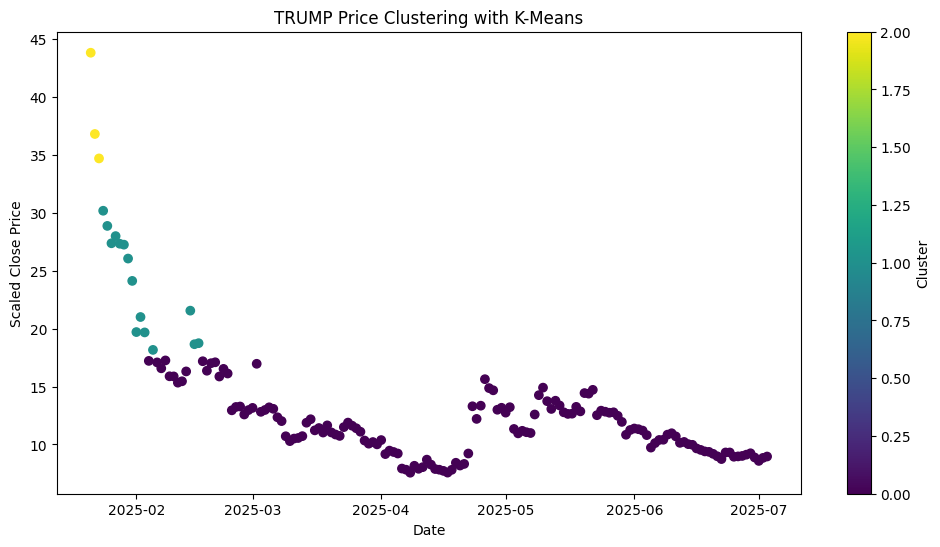

In [ ]:
for coin in merged_data['coin_type'].unique():
   
    coin_data = merged_data[merged_data['coin_type'] == coin].copy()
    
    kmeans = KMeans(n_clusters=3, random_state=42)
    coin_data['cluster'] = kmeans.fit_predict(coin_data[['close']])
    
    plt.figure(figsize=(12,6))
    plt.scatter(
        coin_data['timestamp'],
        coin_data['close'],
        c=coin_data['cluster'],
        cmap='viridis'
    )
    plt.xlabel('Date')
    plt.ylabel('Scaled Close Price')
    plt.title(f'{coin} Price Clustering with K-Means')
    plt.colorbar(label='Cluster')
    plt.show()

## Interpretation of the output: 

K-Means successfully clustered TRUMP and LINK closing prices into three distinct groups for each cryptocurrency, revealing clear patterns of market behavior over time. For both coins, Cluster 0 represents relatively stable periods with minimal price fluctuations. Cluster 1 captures intervals of moderate movements, reflecting typical trading activity. Cluster 2 highlights episodes of high volatility or unusual market events. This segmentation helps identify when each coin shifts between different regimes, which is essential for improving prediction strategies, managing investment risk, and developing trading algorithms that can adapt to changing market conditions.